In [1]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
mpg = pd.read_csv("gdrive/MyDrive/mpg.csv")

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<Axes: xlabel='displ', ylabel='hwy'>

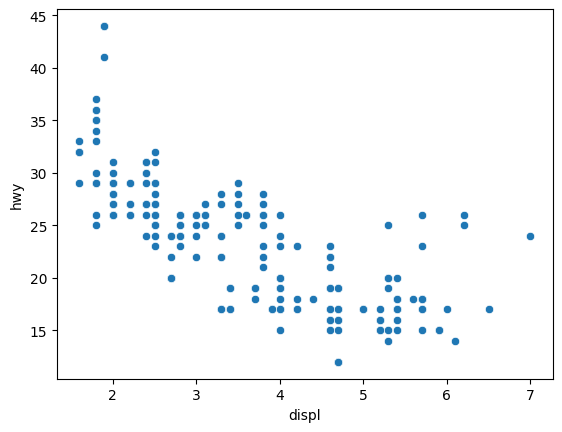

In [5]:
# displ배기량 와 hwy고속도로연비는 상관관계가 있을까?

import seaborn as sns
sns.scatterplot(data=mpg,x='displ',y='hwy')

[(3.0, 6.0)]

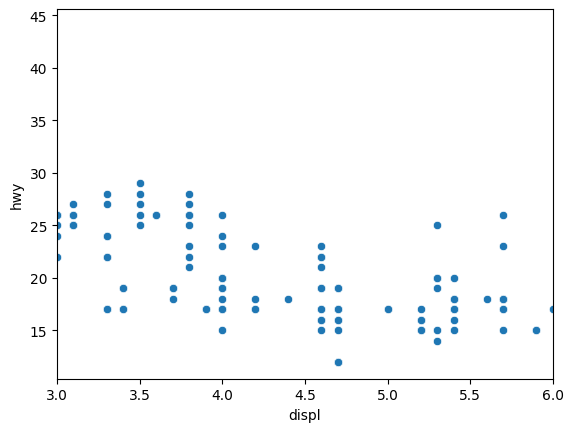

In [7]:
# 범위를 제한할 수 있다!
sns.scatterplot(data=mpg, x='displ',y='hwy').set(xlim=[3,6])

[(3.0, 5.0), (15.0, 30.0)]

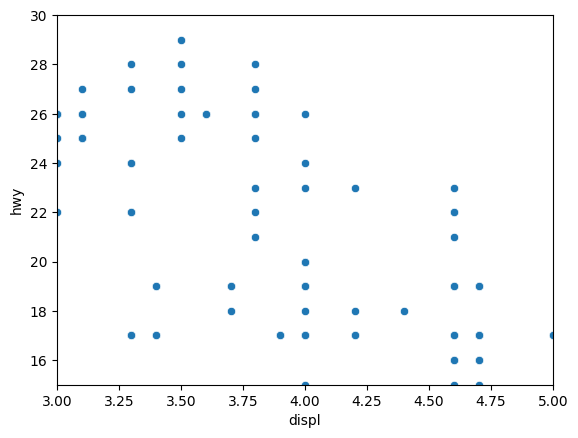

In [8]:
# x,y축 둘 다의 범위 제한하기
sns.scatterplot(data=mpg, x='displ',y='hwy').set(xlim=[3,5],ylim=[15,30])

<Axes: xlabel='displ', ylabel='hwy'>

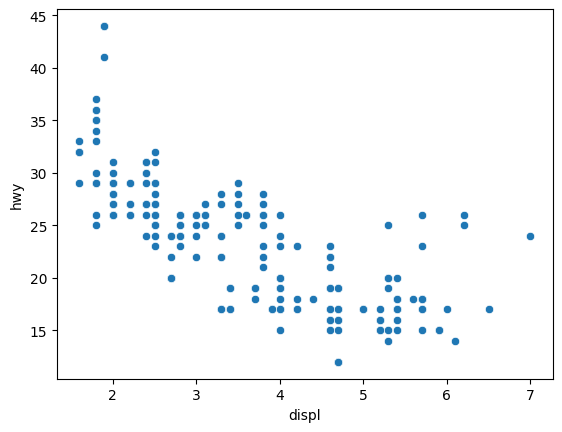

In [9]:
# 구동방식으로 고속도로 연비의 산점도 그래프
sns.scatterplot(data=mpg,x='displ',y='hwy')

In [10]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

<Axes: xlabel='displ', ylabel='hwy'>

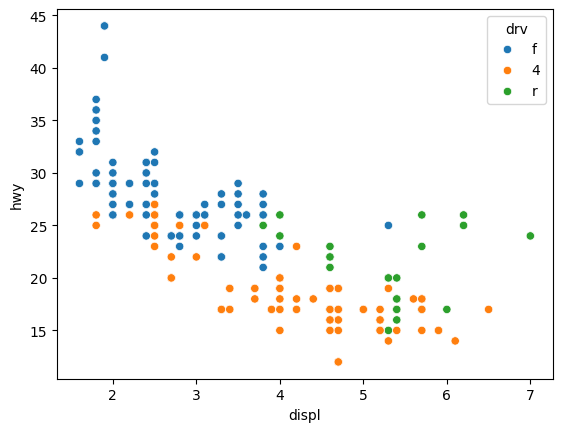

In [11]:
# 배기량, 고속도로 연비의 관계를 점 찍어서 확인햇는디 거기에 구동방식도 구별해서 파악하고싶어.
# 점 찍히는 색을 다르게 하면 좋겟다/. => hue
sns.scatterplot(data=mpg,x='displ',y='hwy',hue='drv')

In [12]:
# 산점도: sns.scatterplot() => 두 변수 간에 상관? 관계가 있는지 확인하고 싶을 때 씀
# 막대그래프: sns.barplot() => 두 집단의 차이 보고 싶을 때

<Axes: xlabel='drv', ylabel='avg'>

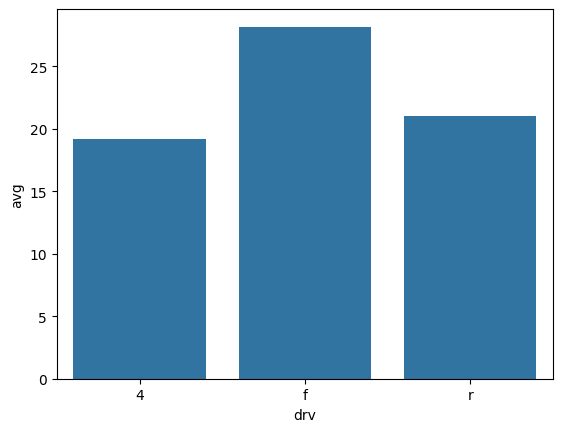

In [22]:
# 어떤 구동방식이 고속도로 연비가 높을까?
df_mpg = mpg.groupby(['drv'],as_index=False).agg(avg=('hwy','mean'))
# df
sns.barplot(data=df_mpg, x='drv',y='avg')

<Axes: xlabel='drv', ylabel='avg'>

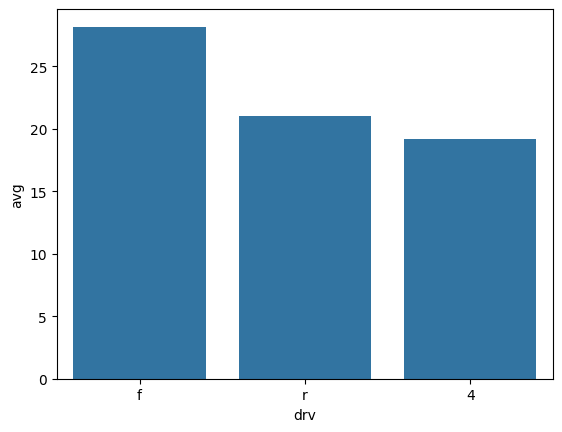

In [24]:
# 값이 큰 순서대로 그래프 그리기
df_mpg = df_mpg.sort_values('avg',ascending=False)
sns.barplot(data=df_mpg, x='drv',y='avg')

In [31]:
# 빈도 막대 그래프
# 연습) 각 구동방식별로 자동차 수 몇대있는지 요약표 만들고 막대그래프그리기
dr_cnt = mpg.groupby(['drv'],as_index=False).agg(count_drv = ('drv','count'))
dr_cnt

,drv,count_drv
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='count_drv'>

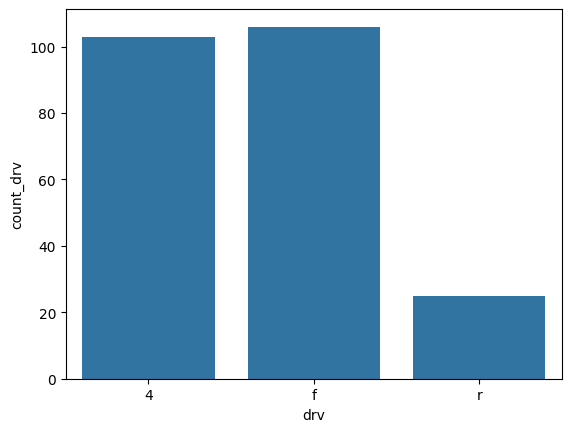

In [32]:
sns.barplot(data=dr_cnt,x='drv',y='count_drv')

<Axes: xlabel='drv', ylabel='count'>

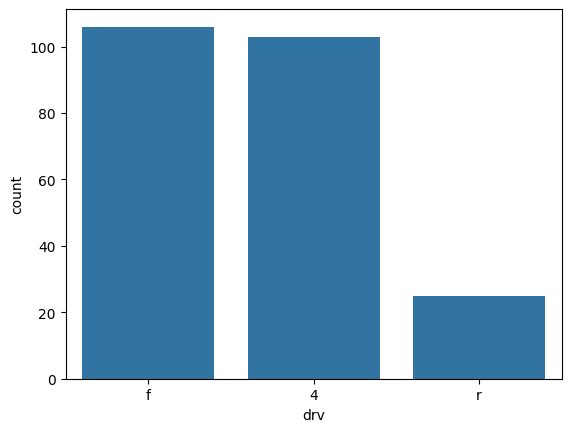

In [34]:
# 종류별로 개수 뽑아서 시각화하는 건 매우 자주 사용. 그래서 함수가 있다.
# sns.countplot(data=데이터프레임, x='컬럼이름')
sns.countplot(data=mpg,x='drv')


In [35]:
# 구동방식 종류 어떤 게 있는지 알고싶다
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [36]:
mpg['drv']

0      f
1      f
2      f
3      f
4      f
      ..
229    f
230    f
231    f
232    f
233    f
Name: drv, Length: 234, dtype: object

In [38]:
mpg['drv'].unique() #오라클의 DISTINCT 처럼 중복을 제거하는 함수

array(['f', '4', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

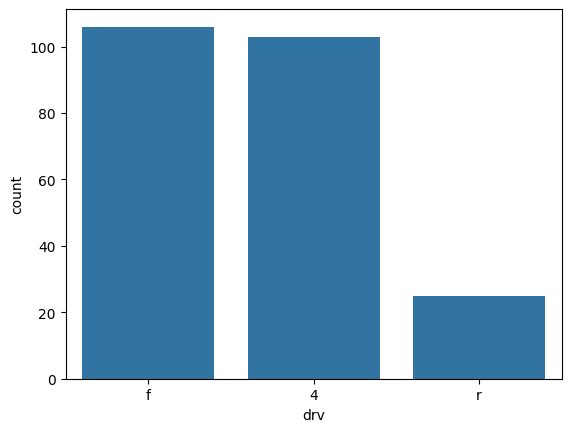

In [39]:
sns.countplot(data=mpg,x='drv')

<Axes: xlabel='drv', ylabel='count'>

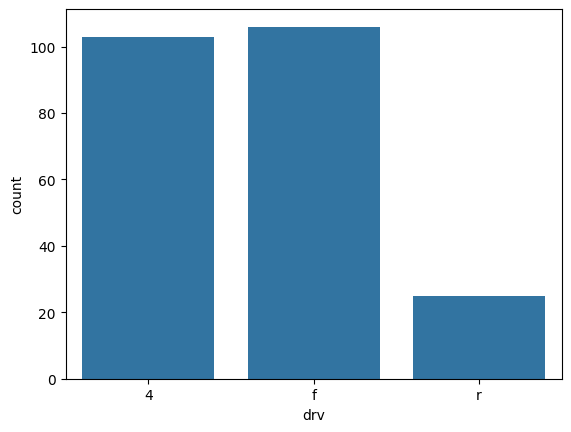

In [40]:
# 값의 빈도수를 막대그래프로 그리기 countplot m=> 값이 큰순서대로 막대 나옴
# 내가 순서를 정해주고싶으면?
sns.countplot(data=mpg, x='drv',order=['4','f','r'])

In [42]:
economics = pd.read_csv('gdrive/MyDrive/economics.csv')

In [43]:
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


<Axes: xlabel='date', ylabel='unemploy'>

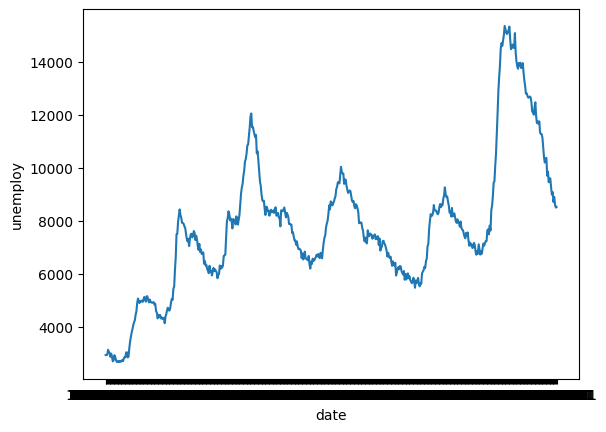

In [44]:
#시계열 데이터: 날짜별 실업자 수 변화 파악하고시퍼
sns.lineplot(data=economics,x='date',y='unemploy')

In [45]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [47]:
#  #   Column    Non-Null Count  Dtype
# ---  ------    --------------  -----
#  0   date      574 non-null    object
# date가 오브젝트로 되어있어서 얘를 날짜자료형으로 바꾸고싶다.
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [50]:
# 날짜자료형으로부터 연도만 뽑아오기
economics['date2'].dt.year
# economics['date2'].dt.month

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [51]:
#연도만 뽀ㅂ아와서 새로운 변수 year 만들기
economics['year'] = economics['date2'].dt.year

<Axes: xlabel='year', ylabel='unemploy'>

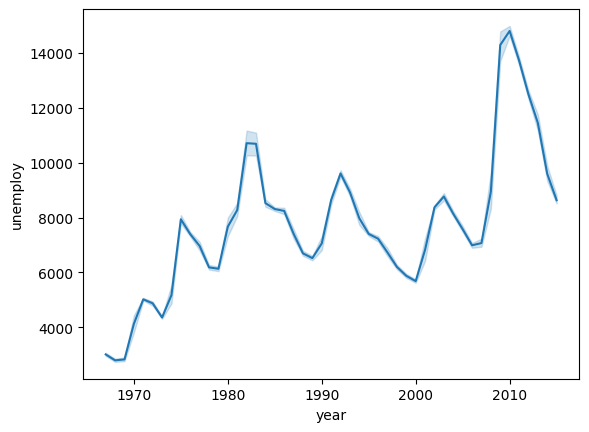

In [52]:
sns.lineplot(data=economics, x='year',y='unemploy')

<Axes: xlabel='drv', ylabel='hwy'>

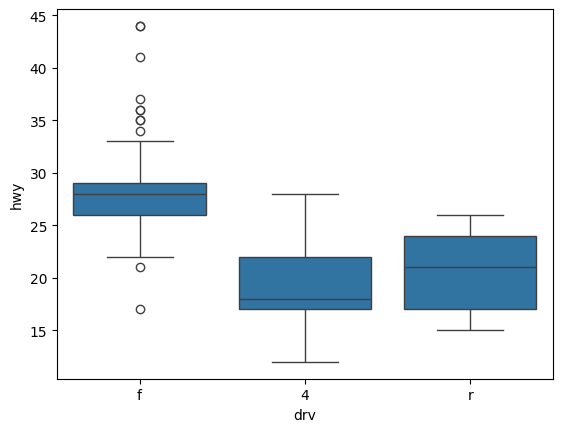

In [54]:
#상자그림: 값 분포 및 이상치 있는지 확인 - sns.boxplot(data=mpg,y='hwy')
sns.boxplot(data=mpg,x='drv',y='hwy')